In [72]:
%reload_ext autoreload
%autoreload 2

In [73]:
import sys
from pathlib import Path

parent_dir = Path.cwd().parent
src_path = parent_dir / 'src'
if str(parent_dir) not in sys.path:
    sys.path.insert(0, str(parent_dir))

from src.data.snb_collector import collect_all_snb_data
from src.data.preprocessor import preprocess_all_snb_data

from src.analysis.asset_side_first import run_full_asset_side_analysis
from src.analysis.sight_deposits import run_full_liability_side_analysis
from src.analysis.asset_side_second import run_full_asset_side_second_analysis

from_date = "2010-01"  

In [74]:
raw_data = collect_all_snb_data(from_date=from_date)


In [75]:
processed_data = preprocess_all_snb_data(raw_data)

In [76]:
display(processed_data['fx_transactions'].tail())

,Date,Total
17,2024-06,103
18,2024-09,728
19,2024-12,103
20,2025-03,49
21,2025-06,5058


# ASSET-SIDE APPROACH
### 1 month delay

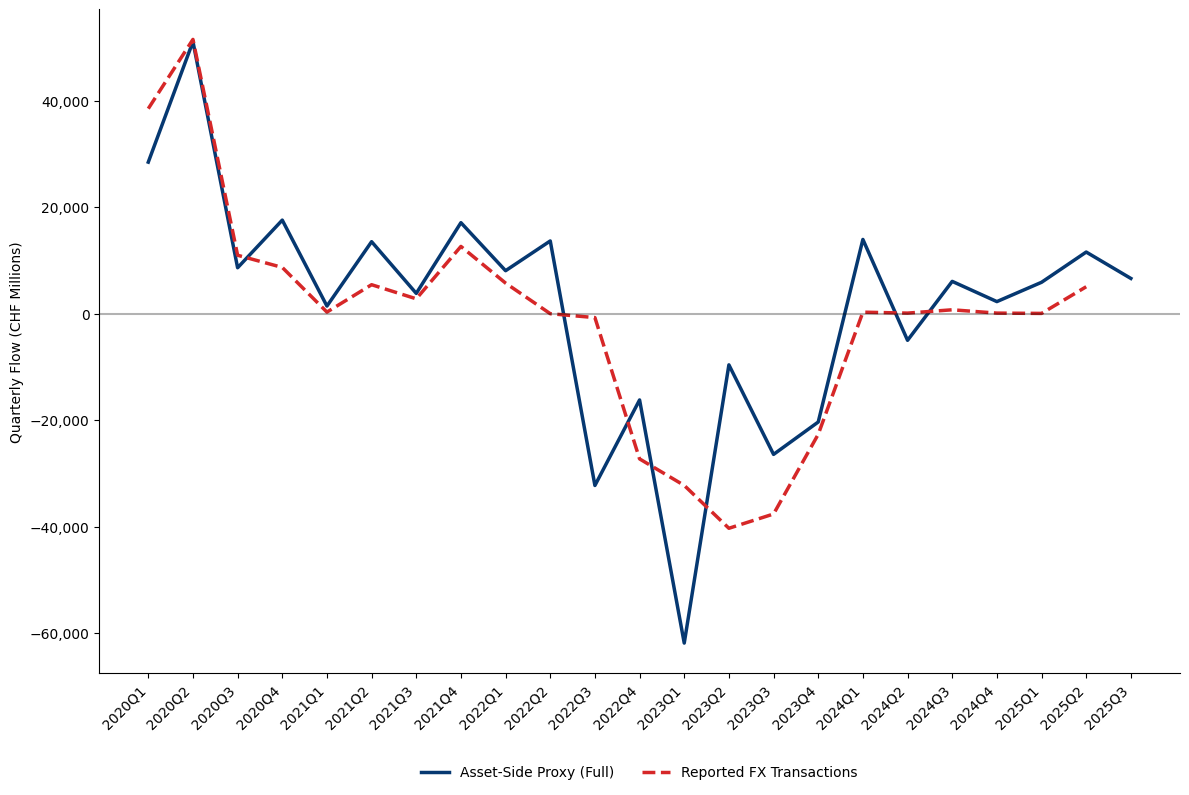

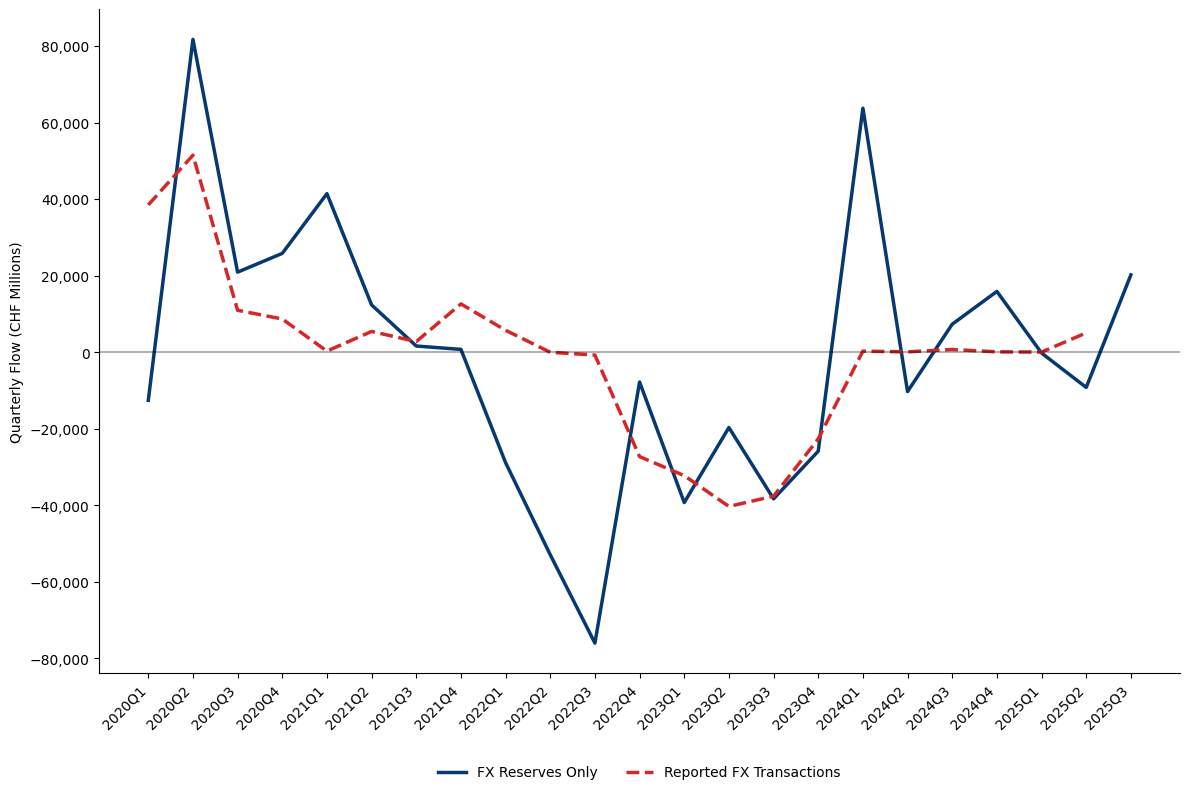

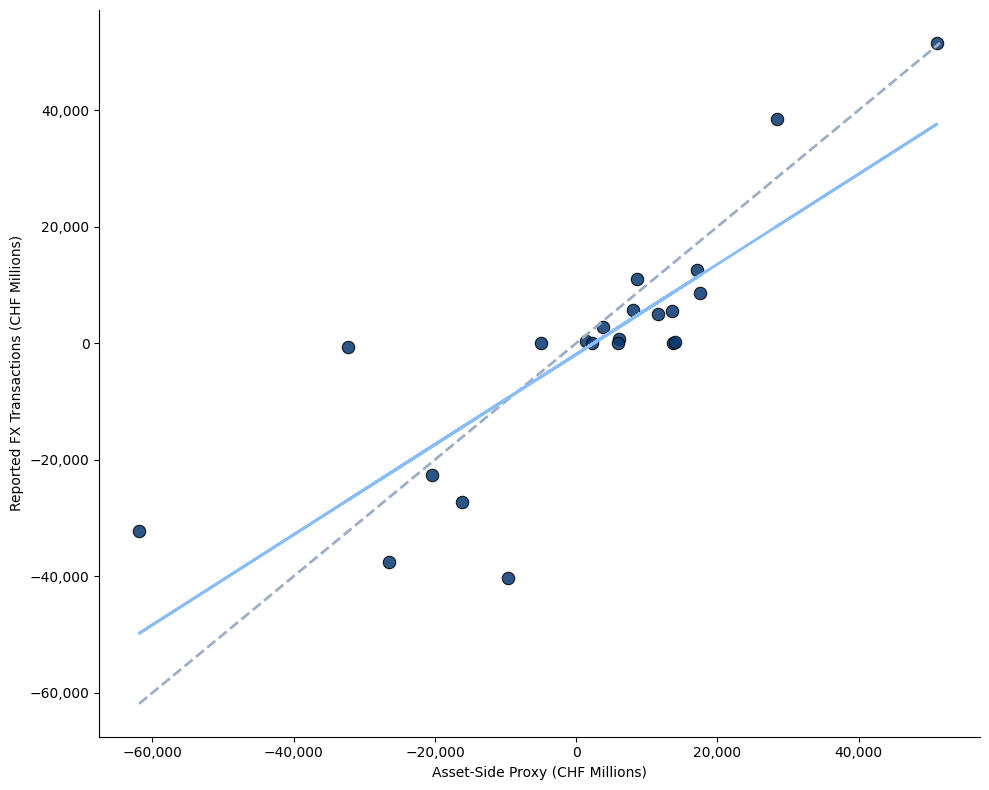

In [77]:
run_full_asset_side_analysis(processed_data)

# LIABILITY-SIDE APPROACH
### 1 month delay

Combined dataset created with 190 observations
Date range: 2010-01 to 2025-10


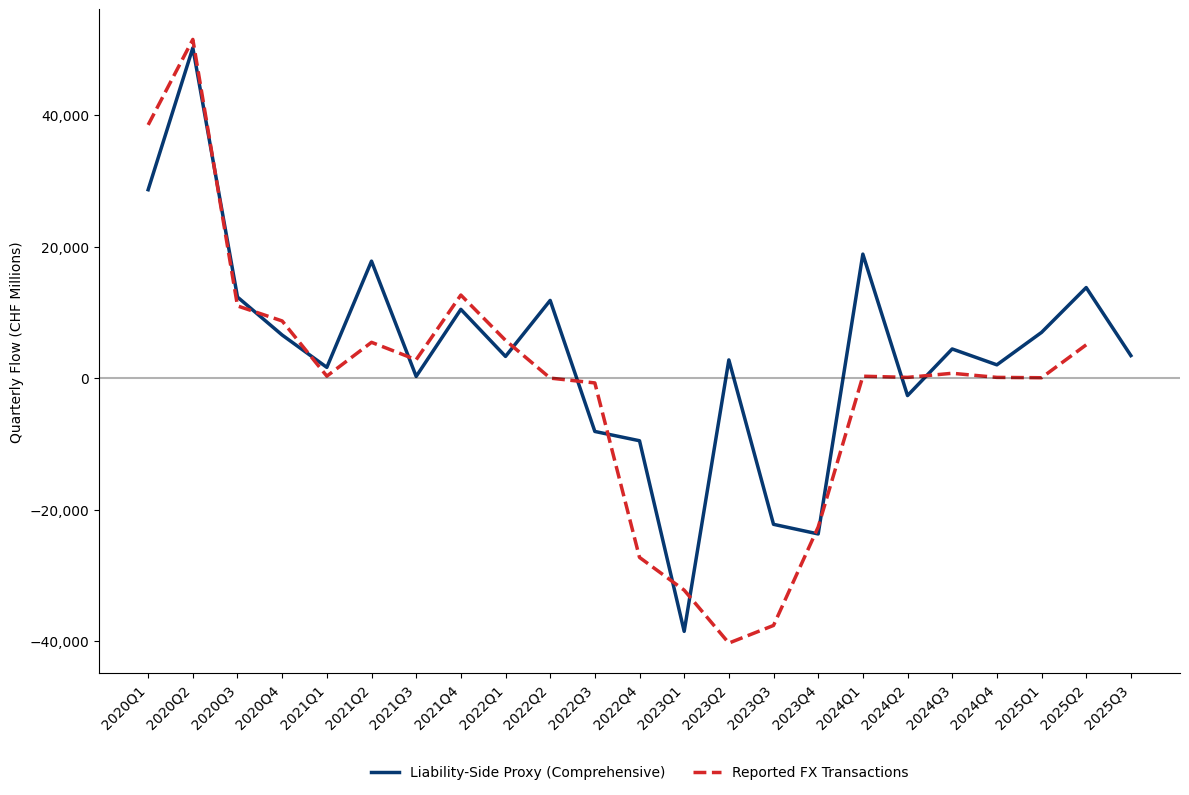

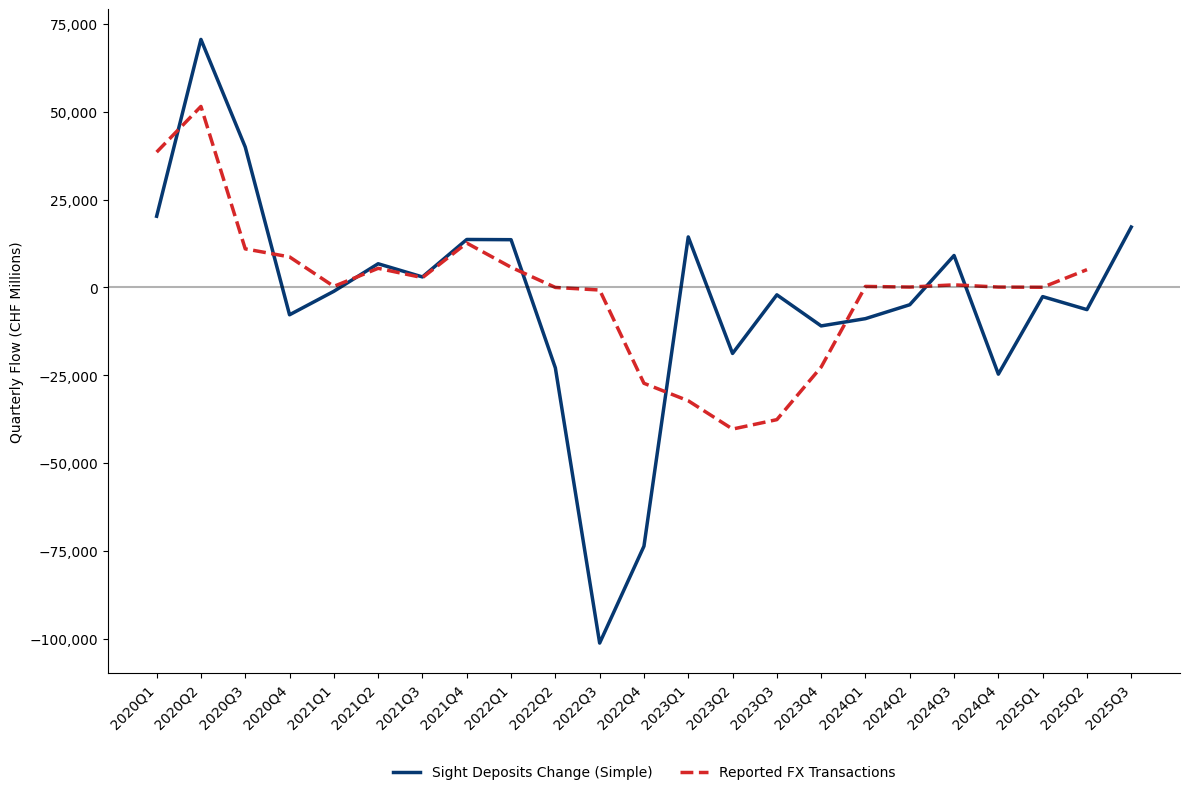

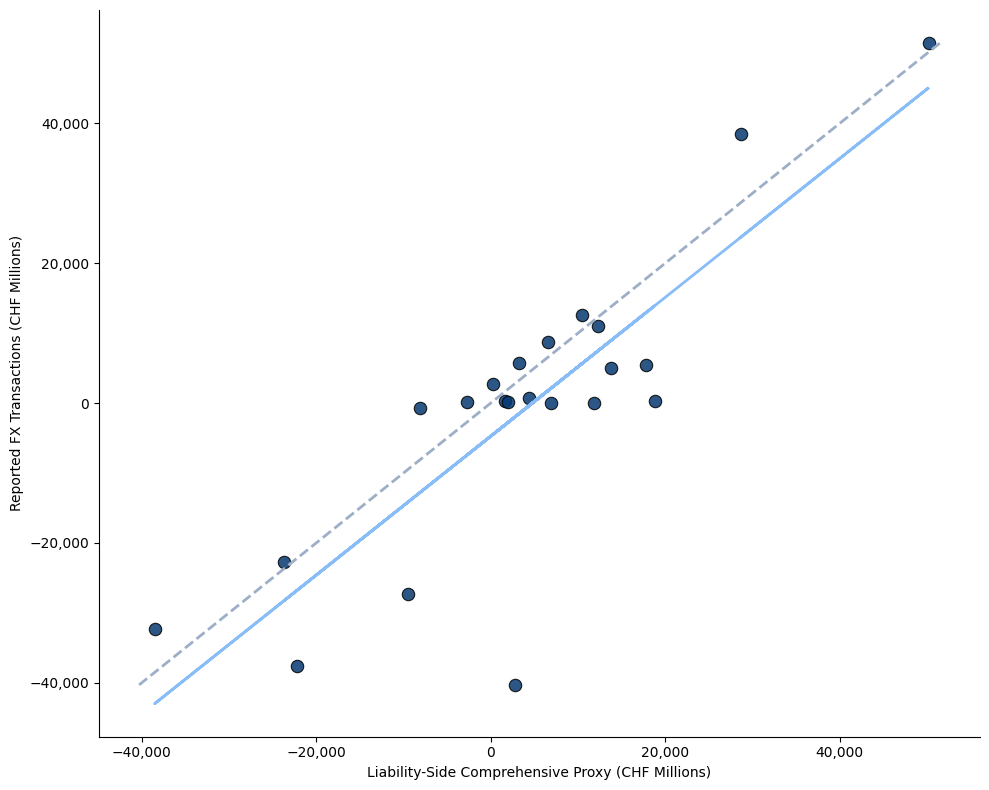


Sight Deposits Intervention Summary:
  Correlation: 0.840
  Mean Absolute Error: 8215.3 CHF Millions
  Root Mean Square Error: 12452.1 CHF Millions
  Quarterly data points: 22


In [78]:
run_full_liability_side_analysis(processed_data)

# ASSET_SIDE APPROACH
### (1 week delay)

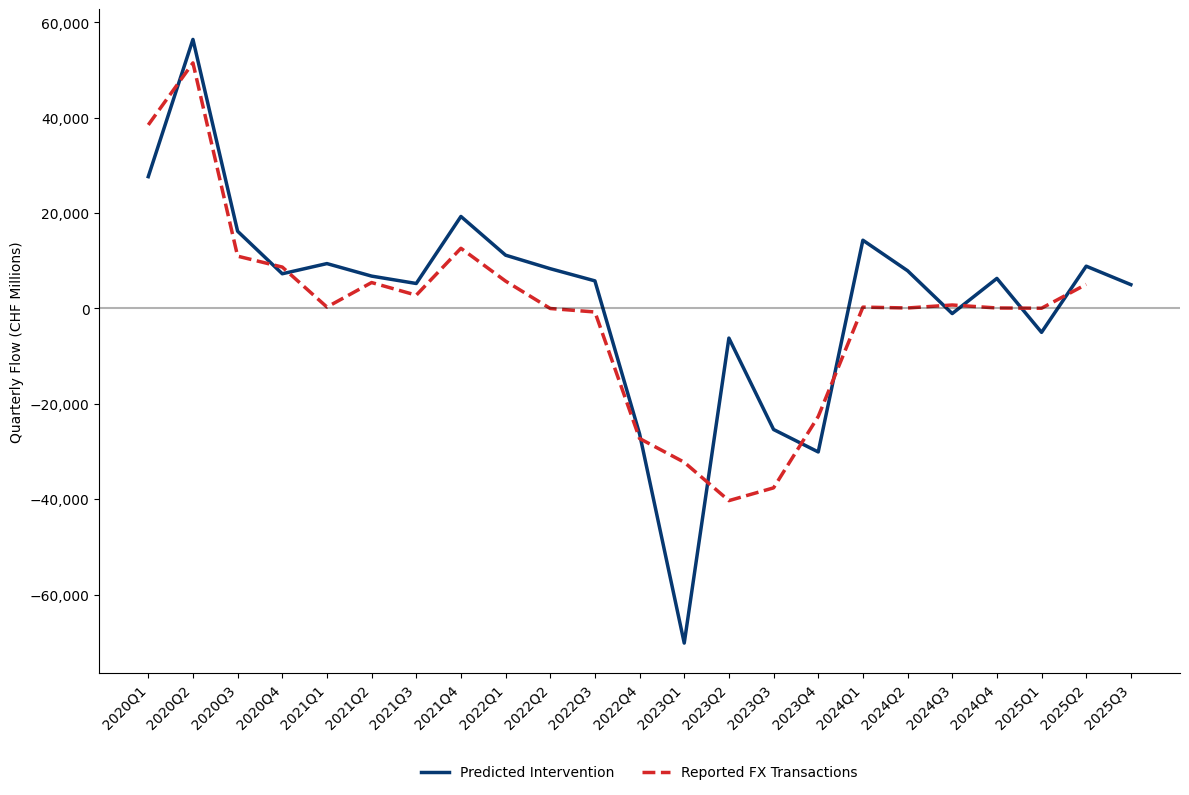


Valuation-Adjusted Intervention Summary:
  Correlation: 0.854
  Mean Absolute Error: 8806.1 CHF Millions
  Root Mean Square Error: 12785.3 CHF Millions
  Quarterly data points: 22


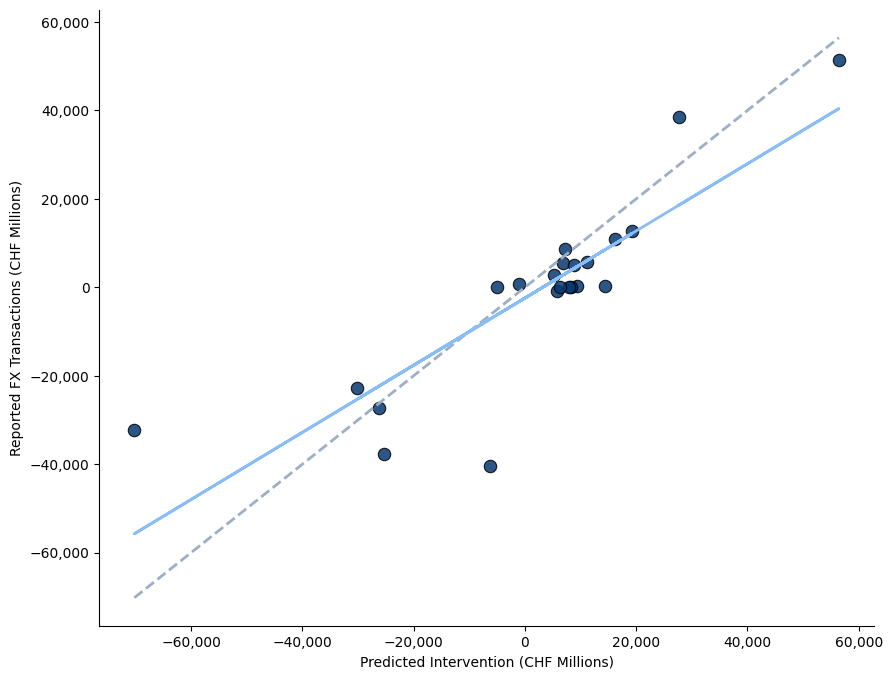

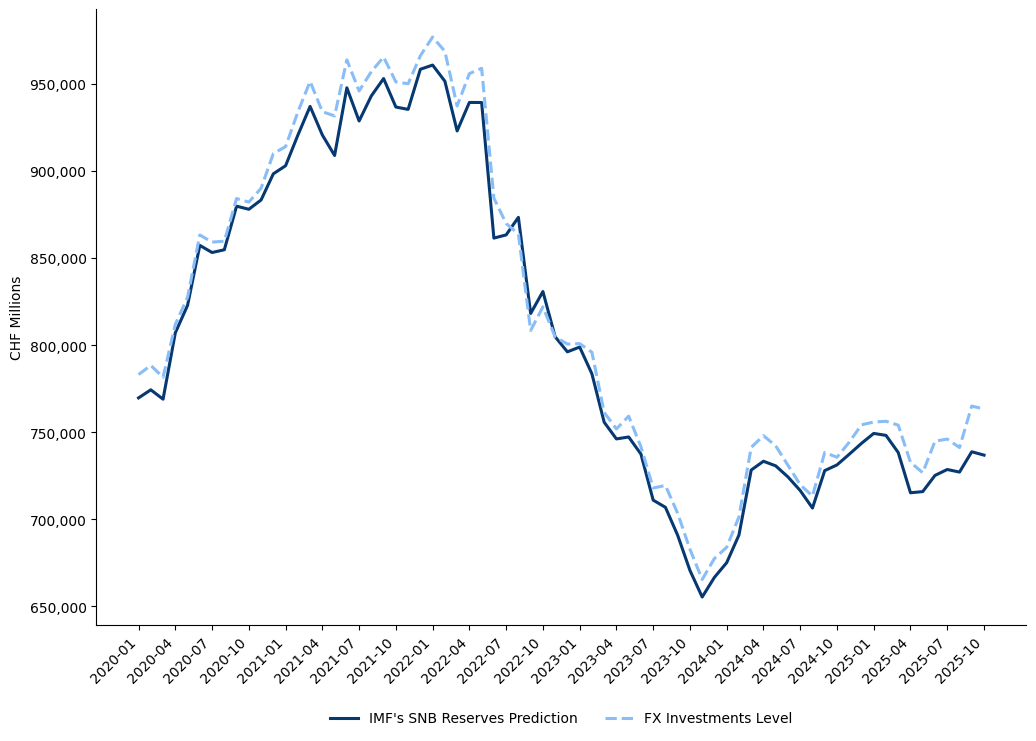

In [79]:
run_full_asset_side_second_analysis(processed_data)